In [35]:
import keras
keras.__version__

'2.2.0'

In [36]:
import pandas as pd
df = pd.read_csv("https://github.com/bgweber/Twitch/raw/master/Recommendations/games-expand.csv")
df.to_csv("games.csv", index=False)
df.head()

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,label
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,1,1,0,0,1,1
4,0,0,1,0,1,1,0,1,1,0,1


In [37]:
df = pd.read_csv("games.csv")
df.head()

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,label
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,1,1,0,0,1,1
4,0,0,1,0,1,1,0,1,1,0,1


In [38]:
train = df[1:15000]
test = df[15001:22900]

test.head()
train.head()

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,label
1,0,0,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,1,1,0,0,1,1
4,0,0,1,0,1,1,0,1,1,0,1
5,1,0,1,0,1,0,0,0,0,0,0


In [39]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10,)))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(500, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(64, activation='relu'))
#model.add(layers.Dense(46, activation='softmax'))
#  layer_dense(units = 1, activation = "sigmoid")
model.add(layers.Dense(1, activation='sigmoid'))


In [40]:
#iris.training = normalize(as.matrix(train[,1:ncol(train) - 1]))
#iris.trainLabels = train$label

x = train.drop(['label'], axis=1)
y = train['label']
x.head()

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10
1,0,0,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,1,1,0,0,1
4,0,0,1,0,1,1,0,1,1,0
5,1,0,1,0,1,0,0,0,0,0


In [41]:
import tensorflow as tf

def auc(y_true, y_pred):
     auc = tf.metrics.auc(y_true, y_pred)[1]
     keras.backend.get_session().run(tf.local_variables_initializer())
     return auc

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=[auc])
#              metrics=['accuracy'])


In [42]:
history = model.fit(x,
                    y,
                    epochs=100,
                    batch_size=100,
                    validation_split = .2,
                    verbose=0)


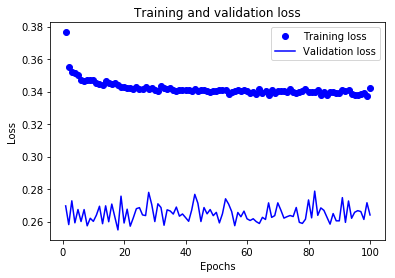

In [43]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

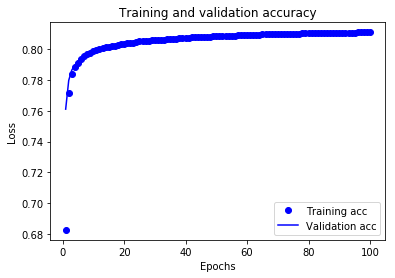

In [44]:
plt.clf()   # clear figure

acc = history.history['auc']
val_acc = history.history['val_auc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [45]:
x_test = test.drop(['label'], axis=1)
y_test = test['label']

results = model.evaluate(x_test, y_test)
results
#results <- model %>% evaluate(test_data, test_targets, verbose = 0)



7899/7899 [==============================] - 0s 35us/step


[0.3054063568210765, 0.8110558545231774]